## Copyright 2023 Google LLC

In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# StyleAligned over SD1.4

In [1]:
from diffusers import DDIMScheduler,StableDiffusionPipeline
import torch
import mediapy
import sa_handler
import math

In [2]:
scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False,
                          set_alpha_to_one=False)
pipeline = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    scheduler=scheduler
)
pipeline = pipeline.to("cuda")
pipeline.enable_vae_slicing() # This reduce VRAM 14 -> 8.3GB

handler = sa_handler.Handler(pipeline)
sa_args = sa_handler.StyleAlignedArgs(share_group_norm=True,
                                      share_layer_norm=True,
                                      share_attention=True,
                                      adain_queries=True,
                                      adain_keys=True,
                                      adain_values=False,
                                     )

handler.register(sa_args, )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from CompVis/stable-diffusion-v1-4 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py:186: FutureWarning: The configuration file of this scheduler: DDIMScheduler {
  "_class_name": "DDIMScheduler",
  "_diffusers_version": "0.27.2",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null
}
 is outdated. `steps_offset` should be set to 1 instea

  0%|          | 0/50 [00:00<?, ?it/s]

,,,,

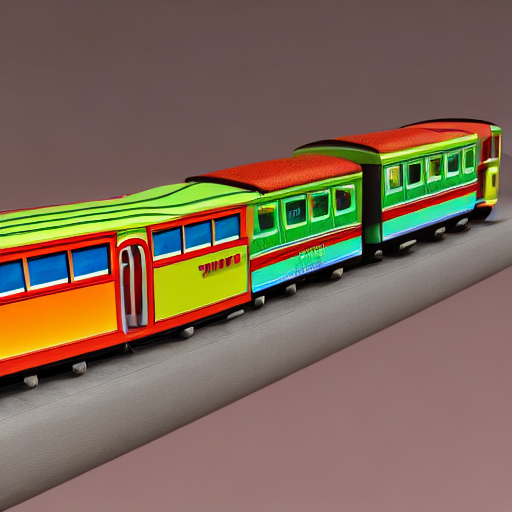
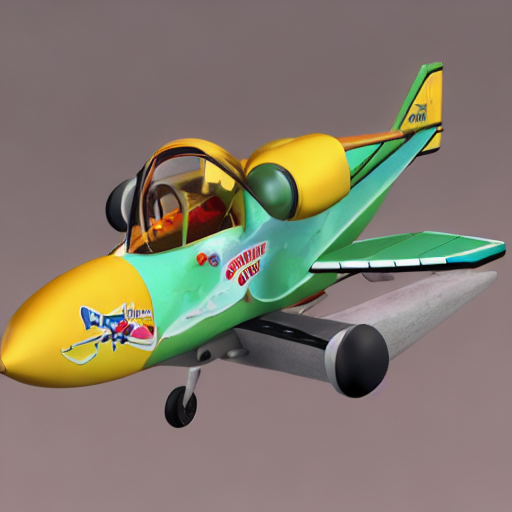
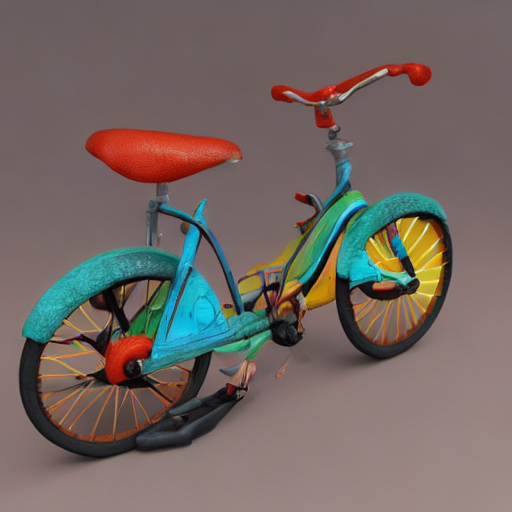
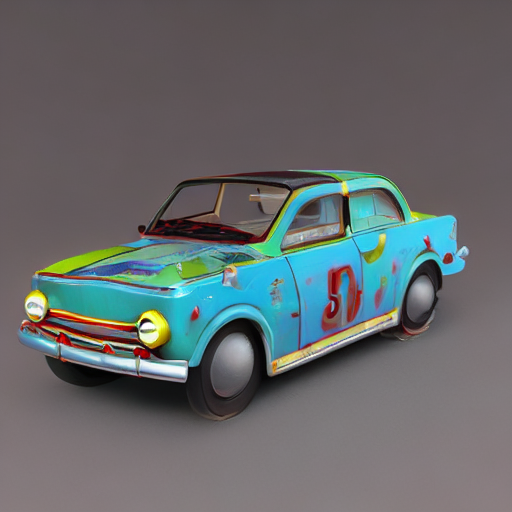
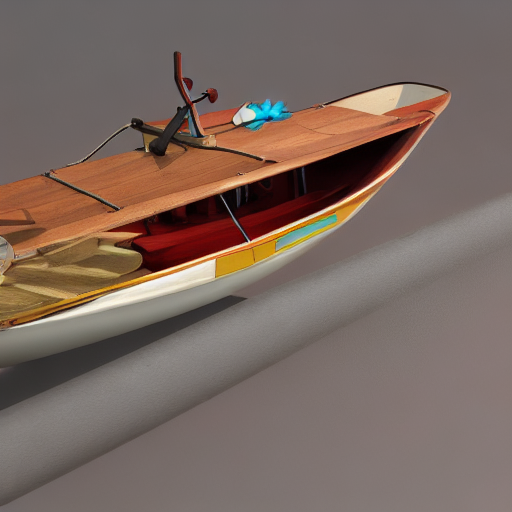

In [4]:
# run StyleAligned

sets_of_prompts = [
  "a toy train. macro photo. 3d game asset",
  "a toy airplane. macro photo. 3d game asset",
  "a toy bicycle. macro photo. 3d game asset",
  "a toy car. macro photo. 3d game asset",
  "a toy boat. macro photo. 3d game asset",
]
images = pipeline(sets_of_prompts, 
                  generator=torch.Generator().manual_seed(40)).images # generator=None, if random
mediapy.show_images(images)